In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import textwrap

In [2]:
df = pd.read_csv('../MainData.csv')
df.head()

,Publication Number,Application Date,Publication Date,IPC Subclass,Assignee - Original,Assignee Standardized,Claims Count,Assignee Count,Inventor - Original,Inventor Standardized,Publication Country Code,Count of Cited Refs - Patent,Inventor Count,IPC Count,Count of Cited Refs - Non-patent,Count of Citing Patents,DWPI Count of Family Members,DWPI Count of Family Countries/Regions,Legal Years Remaining
0,IN202441099749A,2024-12-17,2024-12-20,H04L | G06Q,Jayakani S | Rani Vennila Fathima S | Banu Raf...,JAYAKANI S | RANI VENNILA FATHIMA S | BANU RAF...,10.0,5,"Jayakani, S | Rani, Vennila Fathima S | Banu, ...",JAYAKANI S | RANI VENNILA FATHIMA S | BANU RAF...,IN,0,5,1,0,0,1.0,1.0,19
1,TR2024019326A2,2024-12-16,2024-12-23,G06Q,TURKCELL TEKNOLOJİ ARAŞTIRMA VE GELİŞTİRME ANO...,TURKCELL TEKNOLOJİ ARAŞTIRMA VE GELİŞTİRME ANO...,16.0,1,ÖMER YILMAZ,ÖMER YILMAZ,TR,0,1,1,0,0,1.0,1.0,19
2,IN202441099497A,2024-12-16,2024-12-27,G06Q,SAVEETHA ENGINEERING COLLEGE,SAVEETHA ENGINEERING COLLEGE,6.0,1,"Kanagaraj, Alias Ganesan M | Karthick, K K | V...",KANAGARAJ ALIAS GANESAN M | KARTHICK K K | VIM...,IN,0,4,1,0,0,1.0,1.0,19
3,TR2024018329A2,2024-12-11,2024-12-23,G06Q,TURKCELL TEKNOLOJİ ARAŞTIRMA VE GELİŞTİRME ANO...,TURKCELL TEKNOLOJİ ARAŞTIRMA VE GELİŞTİRME ANO...,8.0,2,ÖZGE GÜLER KUŞ | OZAN TEMMUZ GÜRCANOK,ÖZGE GÜLER KUŞ | OZAN TEMMUZ GÜRCANOK,TR,0,2,1,0,0,1.0,1.0,19
4,IN202441096888A,2024-12-08,2024-12-13,G06Q | G06N | B32B,Rai Karunakara B | Hemalatha K J | Pareek Piyu...,RAI KARUNAKARA B | HEMALATHA K J | PAREEK PIYU...,3.0,4,"Rai, Karunakara B | Hemalatha, K J | Pareek, P...",RAI KARUNAKARA B | HEMALATHA K J | PAREEK PIYU...,IN,0,3,1,0,0,1.0,1.0,19


In [3]:
df.columns

Index(['Publication Number', 'Application Date', 'Publication Date',
       'IPC Subclass', 'Assignee - Original', 'Assignee Standardized',
       'Claims Count', 'Assignee Count', 'Inventor - Original',
       'Inventor Standardized', 'Publication Country Code',
       'Count of Cited Refs - Patent', 'Inventor Count', 'IPC Count',
       'Count of Cited Refs - Non-patent', 'Count of Citing Patents',
       'DWPI Count of Family Members',
       'DWPI Count of Family Countries/Regions', 'Legal Years Remaining'],
      dtype='object')

In [4]:
ipc_labels = {
    "H04W": "H04W - Wireless communication networks",
    "G06Q": "G06Q - Data processing for admin/finance/commerce",
    "G06F": "G06F - Electric digital data processing (computers)",
    "H04L": "H04L - Transmission of digital information",
    "H04B": "H04B - Transmission (general)",
    "G06N": "G06N - Computer systems based on specific models (AI/NN etc.)",
    "G06V": "G06V - Image or video recognition / understanding",
    "G06K": "G06K - Recognition/presentation of data; record carriers",
    "G10L": "G10L - Speech analysis, synthesis, recognition",
    "H04N": "H04N - Pictorial communication (television, video)",
    "G06T": "G06T - Image data processing or generation (general)",
    "G01S": "G01S - Radio direction-finding, navigation, radar",
    "G07F": "G07F - Coin-freed/vending apparatus",
    "H04M": "H04M - Telephonic communication",
    "H04J": "H04J - Multiplex communication",
    "G08G": "G08G - Traffic control systems",
    "G16H": "G16H - Health informatics (ICT for healthcare)",
    "B60W": "B60W - Conjoint control of vehicle sub-units",
    "H03M": "H03M - Coding, decoding, or code conversion",
    "G07G": "G07G - Cash register / point-of-sale systems",
}

def plot_top_entities(
    df: pd.DataFrame,
    column: str,
    k_per_record: int = 1,
    top_n: int = 20,
    wrap_width: int = 25,
    xlabel: str = "Number of Patents",
    ylabel: str = "Entity",
    title: str = "Top Entities",
    figsize=(14,11),
    exclude=None,
    label_map=None   # <- pass mapping dict here
):
    from collections import Counter
    import matplotlib.pyplot as plt
    import textwrap

    if exclude is None:
        exclude = set()
    else:
        exclude = set(exclude)

    def top_k(entry: str) -> str:
        if not isinstance(entry, str):
            return ""
        parts = [x.strip() for x in entry.split(',')]
        return " | ".join(parts[:k_per_record])

    df_tmp = df.copy()
    df_tmp[column + "_top"] = df_tmp[column].apply(top_k)

    counts = Counter()
    for entry in df_tmp[column + "_top"]:
        if isinstance(entry, str) and entry.strip():
            for name in entry.split('|'):
                name = name.strip()
                if name and name not in exclude:
                    counts[name] += 1

    count_df = pd.DataFrame(counts.items(), columns=[column, 'Count'])
    count_df = count_df.sort_values(by='Count', ascending=False).head(top_n)

    # Replace labels using dictionary if provided
    if label_map:
        count_df['label'] = count_df[column].map(lambda x: label_map.get(x, x))
    else:
        count_df['label'] = count_df[column]

    # Wrap long labels
    count_df['wrapped'] = count_df['label'].apply(
        lambda lbl: "\n".join(textwrap.wrap(lbl, wrap_width))
    )

    plt.figure(figsize=figsize)
    bars = plt.barh(count_df['wrapped'], count_df['Count'], height=0.6)
    plt.gca().invert_yaxis()
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=8)

    for bar in bars:
        w = bar.get_width()
        plt.text(w + 0.5, bar.get_y() + bar.get_height()/2,
                 str(int(w)), va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

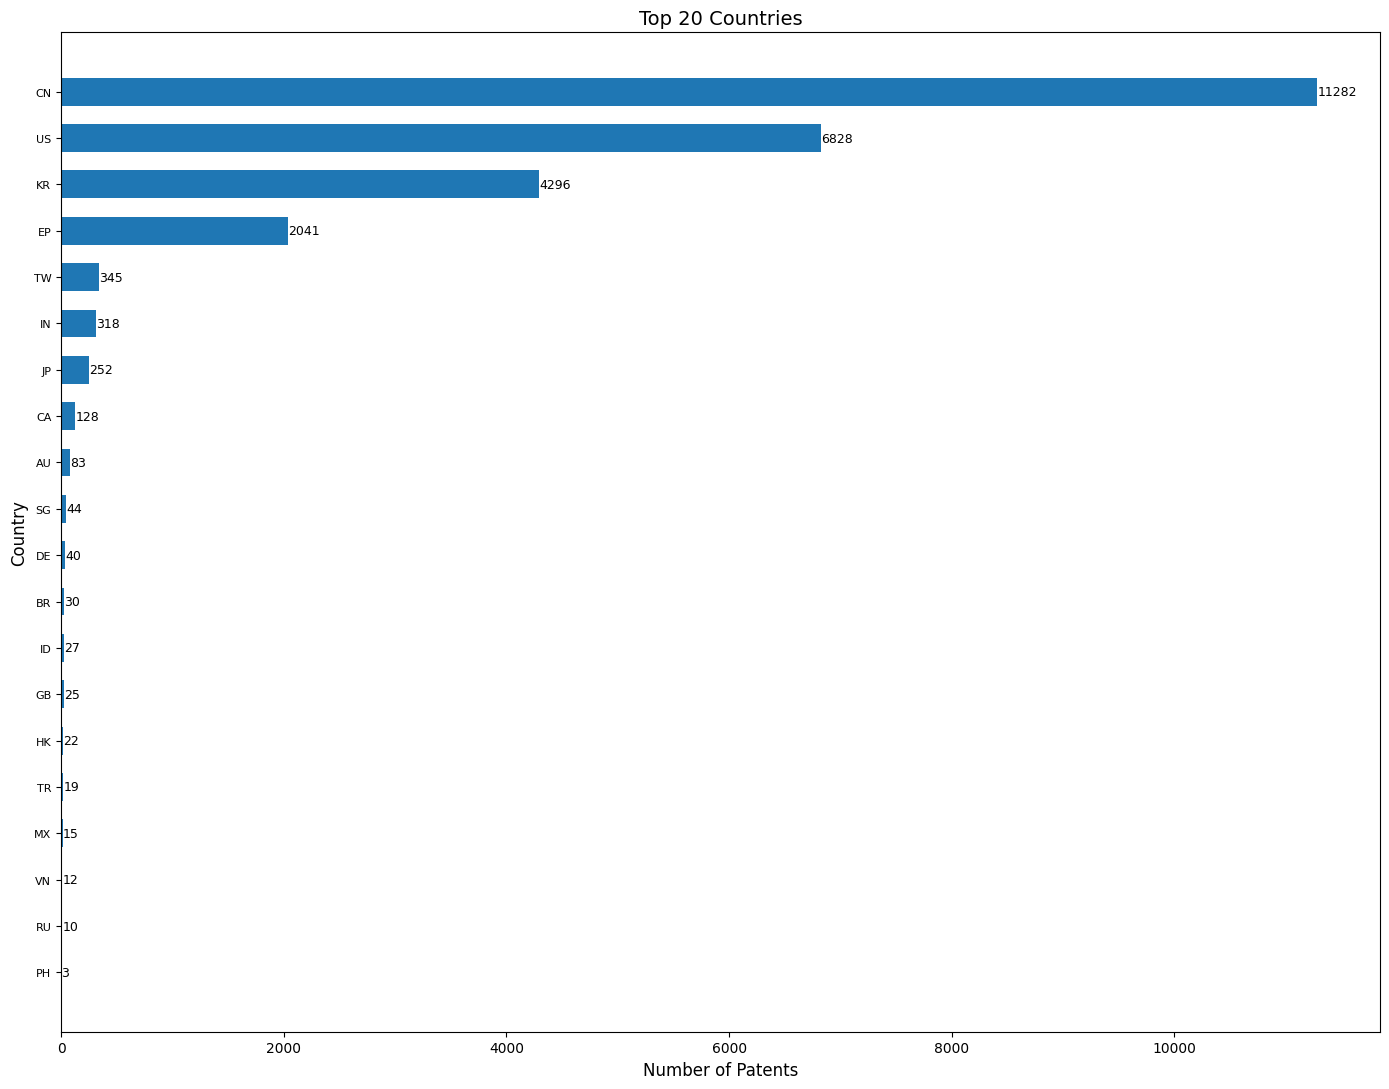

In [5]:
plot_top_entities(
    df,
    column="Publication Country Code",
    k_per_record=1,
    title="Top 20 Countries",
    ylabel="Country",
    exclude=["WO"]
)

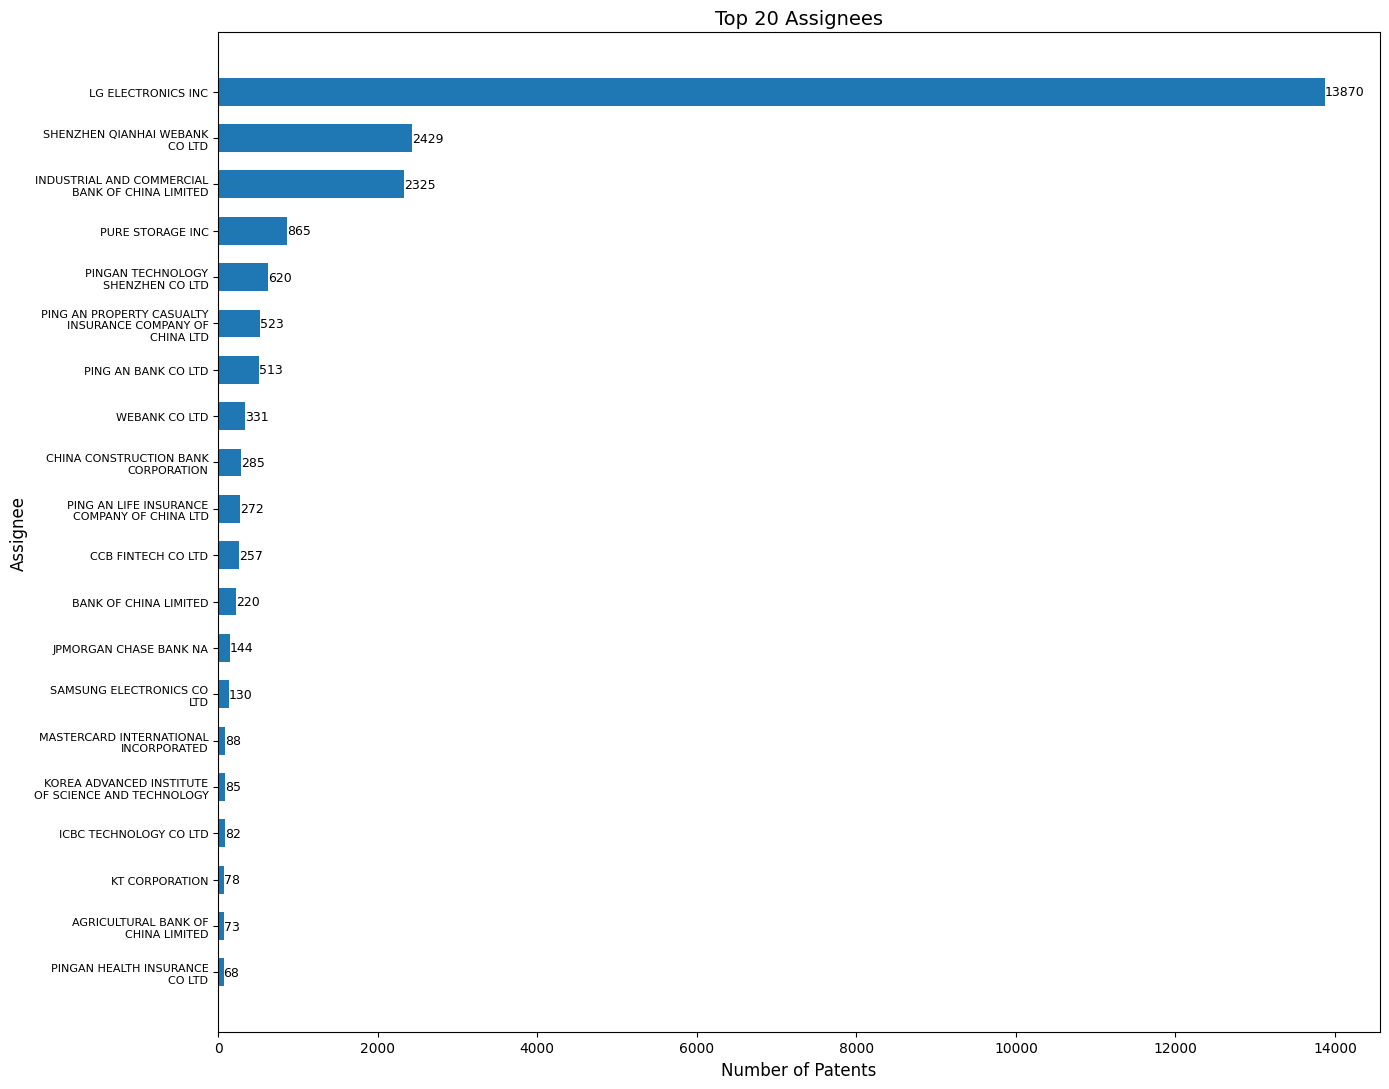

In [6]:
plot_top_entities(df, column="Assignee Standardized",
                  k_per_record=1,
                  title="Top 20 Assignees",
                  ylabel="Assignee")

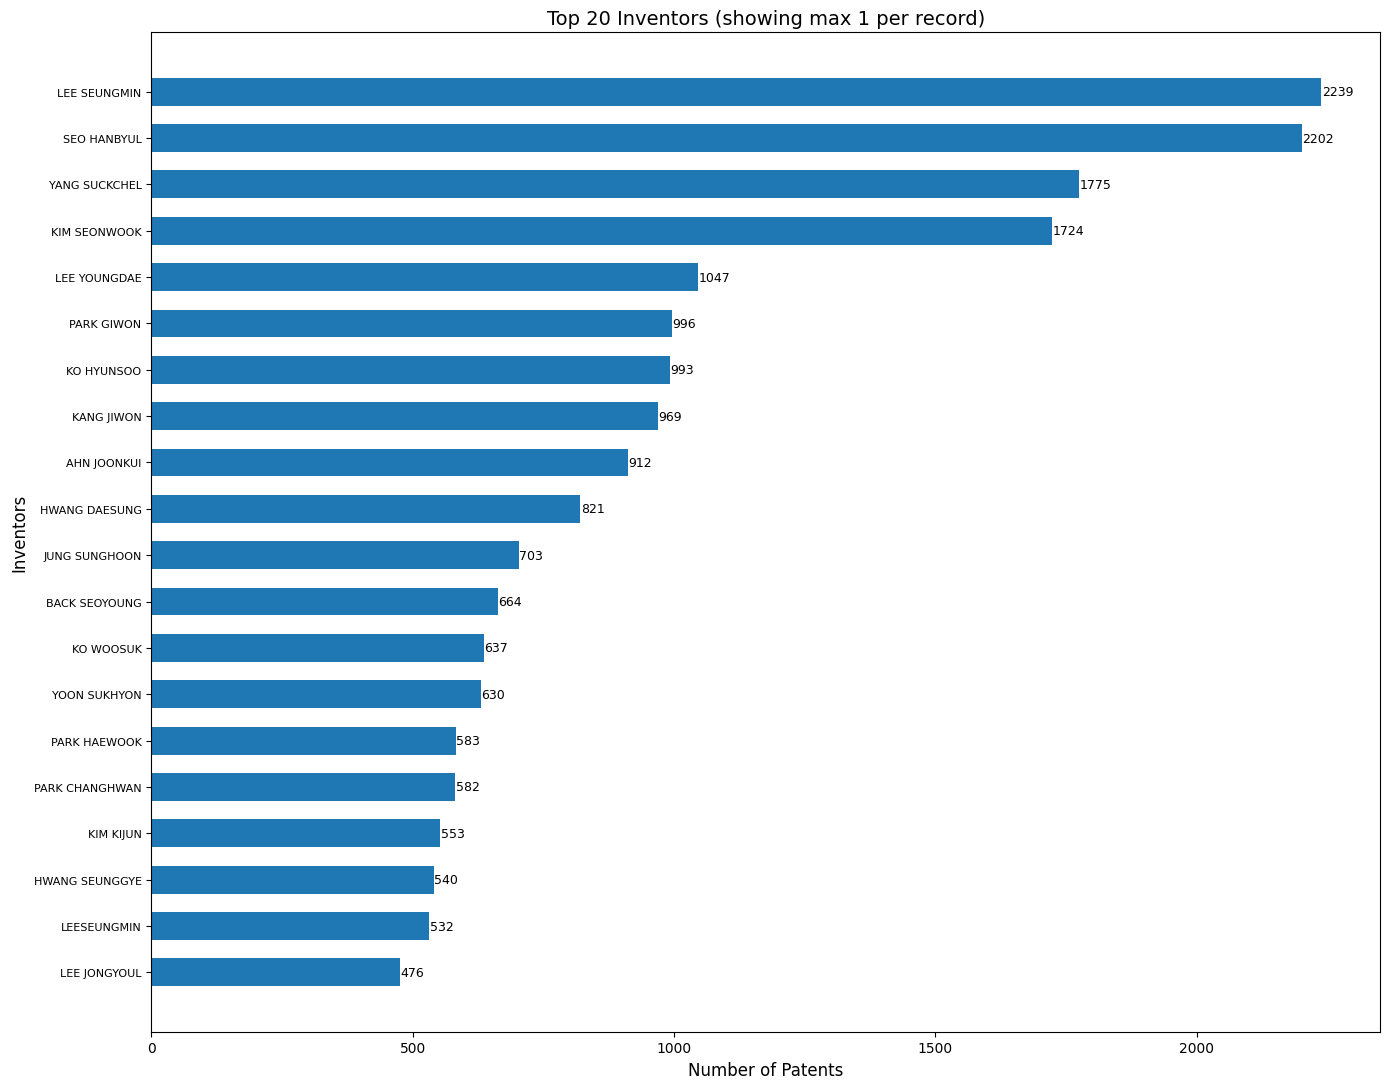

In [7]:
plot_top_entities(df, column="Inventor Standardized",
                  k_per_record=1,
                  title="Top 20 Inventors (showing max 1 per record)",
                  ylabel="Inventors")

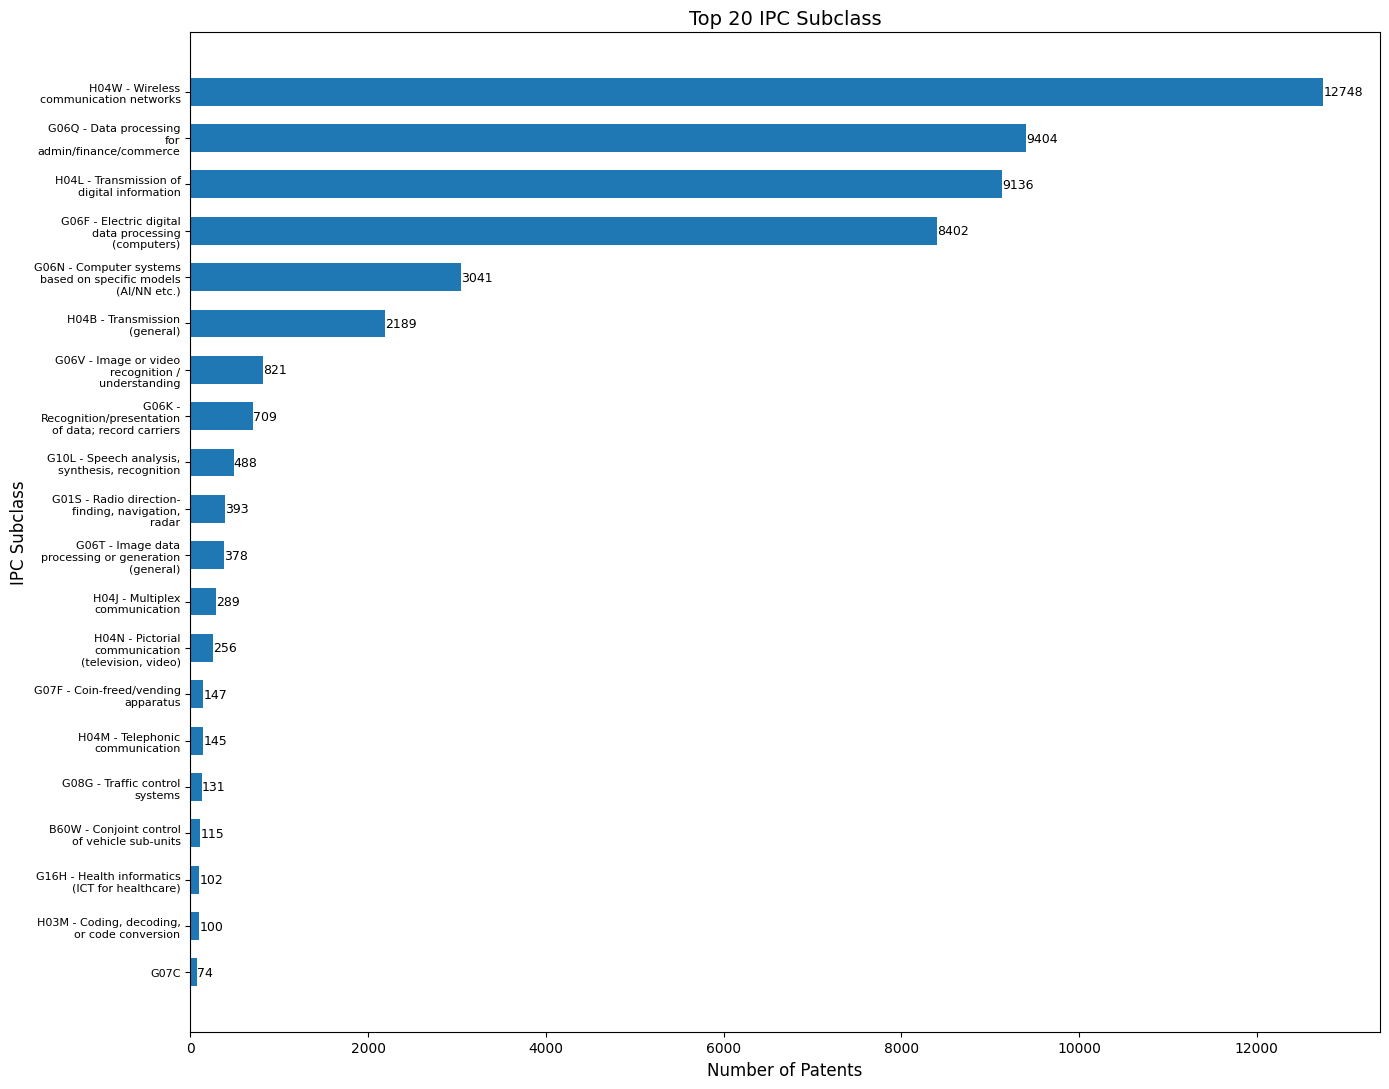

In [8]:
plot_top_entities(
    df,
    column="IPC Subclass",
    k_per_record=1,
    title="Top 20 IPC Subclass",
    ylabel="IPC Subclass",
    label_map=ipc_labels
)

In [9]:
df['Application Date'].head()

0    2024-12-17
1    2024-12-16
2    2024-12-16
3    2024-12-11
4    2024-12-08
Name: Application Date, dtype: object

      count
Year       
2000      4
2001      7
2002      8
2003     11
2004     15 
       count
Year       
2020   5263
2021   5140
2022   4997
2023   5526
2024   4297 
Total rows counted: 30592


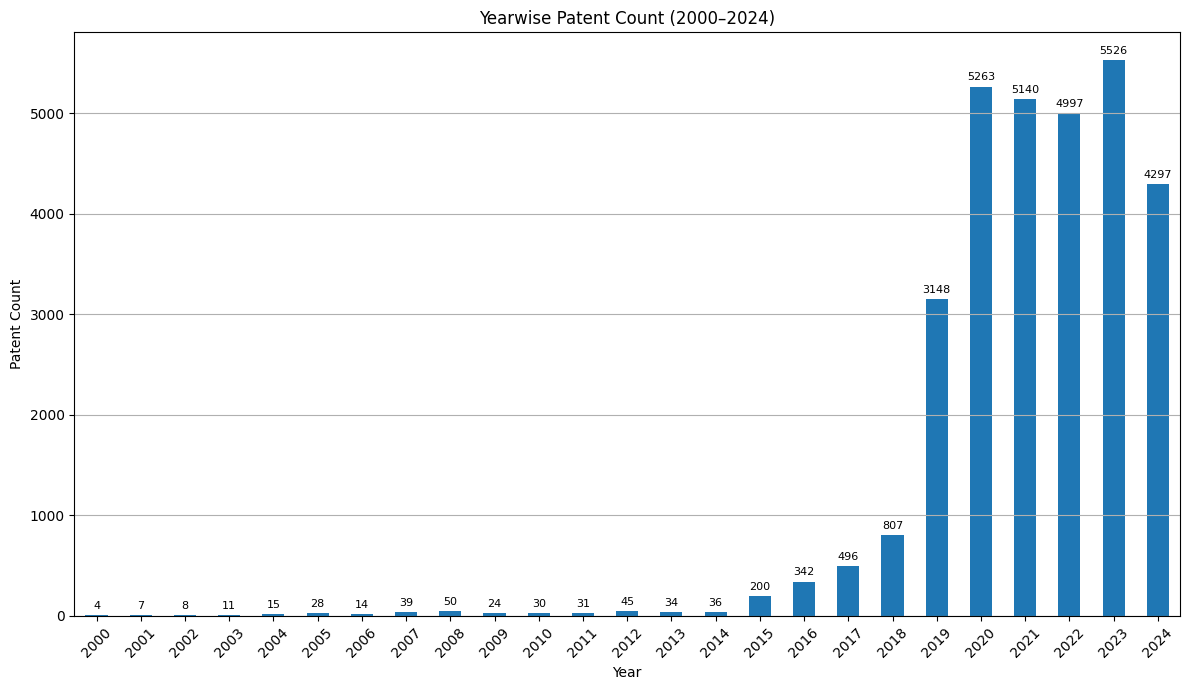

In [10]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

YEAR_START, YEAR_END = 2000, 2024
DATE_COL = "Application Date"          # change to "Publication Date" if needed

def parse_date(s: pd.Series) -> pd.Series:
    # try fast ISO parse, then common alt formats
    d = pd.to_datetime(s, errors="coerce", format="ISO8601")
    mask = d.isna()
    if mask.any():
        d2 = pd.to_datetime(s[mask], errors="coerce", dayfirst=True)  # handles 31/12/2020 etc.
        d.loc[mask] = d2
    return d  # keep naive; no tz to avoid year rollover

year_counts = defaultdict(int)

for chunk in pd.read_csv("../MainData.csv", usecols=[DATE_COL], chunksize=30000, dtype={DATE_COL: "string"}):
    d = parse_date(chunk[DATE_COL])
    y = d.dropna().dt.year
    counts = y.value_counts()
    for year, c in counts.items():
        if YEAR_START <= int(year) <= YEAR_END:
            year_counts[int(year)] += int(c)

# build full index
year_idx = list(range(YEAR_START, YEAR_END + 1))
year_df = pd.Series(year_counts, index=year_idx, name="count").fillna(0).astype(int).to_frame()
year_df.index.name = "Year"

# quick sanity check
print(year_df.head(), "\n", year_df.tail(), "\nTotal rows counted:", year_df["count"].sum())

# plot
ax = year_df.plot(kind="bar", figsize=(12, 7), legend=False)
ax.set_title("Yearwise Patent Count (2000–2024)")
ax.set_xlabel("Year")
ax.set_ylabel("Patent Count")
plt.xticks(rotation=45)
plt.grid(axis="y")

for p in ax.patches:
    h = int(p.get_height())
    if h > 0:
        ax.annotate(f"{h}", (p.get_x() + p.get_width()/2, h),
                    xytext=(0, 3), textcoords="offset points", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

In [15]:
df['Application Date']

0        2024-12-17
1        2024-12-16
2        2024-12-16
3        2024-12-11
4        2024-12-08
            ...    
30587    2018-08-07
30588    2018-05-17
30589    2017-06-21
30590    2016-02-12
30591    2016-02-12
Name: Application Date, Length: 30592, dtype: object